In [1]:
import keras
import os
%pylab inline

Using TensorFlow backend.


Populating the interactive namespace from numpy and matplotlib


In [2]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

In [3]:
DATAFOLDER = '/home/d/Dropbox/CS410CatsAndDogz/'

In [4]:
train_generator = keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
X_train = train_generator.flow_from_directory(DATAFOLDER+'/train', 
                                              color_mode='grayscale', 
                                              target_size=(100,100))

Found 5998 images belonging to 2 classes.


In [5]:
test_generator = keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
X_test = test_generator.flow_from_directory(DATAFOLDER+'/test',
                                            color_mode='grayscale',
                                            target_size=(100,100))

Found 2998 images belonging to 2 classes.


In [6]:
X_train[0][1][1]

array([0., 1.], dtype=float32)

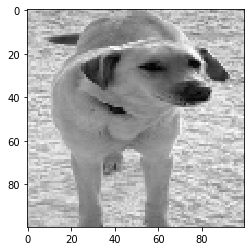

In [7]:
imshow(X_train[0][0][1,:,:,0], cmap='gray')

In [8]:
X_train[0][0][0,:,:,0].max()

0.9294118

In [38]:
X_train[0][0].shape

(32, 100, 100, 1)

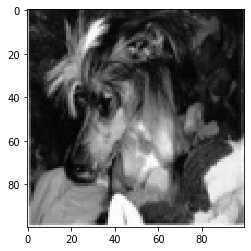

In [9]:
imshow(X_train[100][0][31,:,:,0], cmap='gray')

In [10]:
NUMBER_OF_CLASSES = 2

In [11]:
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(32, kernel_size=(3, 3),
                             activation='relu',
                             input_shape=X_train[0].shape))
model.add(keras.layers.Conv2D(64, (3, 3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(keras.layers.Dropout(0.25))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(NUMBER_OF_CLASSES, activation='softmax'))
# model.add(keras.layers.Conv2D(32, kernel_size=(3, 3),
#                              activation='relu',
#                              input_shape=(100,100,1)))
# model.add(keras.layers.Conv2D(64, (3, 3), activation='relu'))
# model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
# model.add(keras.layers.Dropout(0.25))
# model.add(keras.layers.Flatten())
# model.add(keras.layers.Dense(128, activation='relu'))
# model.add(keras.layers.Dropout(0.5))
# model.add(keras.layers.Dense(NUMBER_OF_CLASSES, activation='softmax'))

In [12]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

In [13]:
model.fit_generator(X_train, epochs=30, steps_per_epoch=32)

Epoch 1/30
32/32 [==============================] - 5s 142ms/step - loss: 0.8051 - accuracy: 0.5107
Epoch 2/30
32/32 [==============================] - 4s 114ms/step - loss: 0.6930 - accuracy: 0.5146
Epoch 3/30
32/32 [==============================] - 4s 112ms/step - loss: 0.6926 - accuracy: 0.5195
Epoch 4/30
32/32 [==============================] - 4s 112ms/step - loss: 0.6919 - accuracy: 0.5254
Epoch 5/30
32/32 [==============================] - 4s 112ms/step - loss: 0.6869 - accuracy: 0.5258
Epoch 6/30
32/32 [==============================] - 4s 115ms/step - loss: 0.6894 - accuracy: 0.5527
Epoch 7/30
32/32 [==============================] - 4s 114ms/step - loss: 0.6810 - accuracy: 0.5781
Epoch 8/30
32/32 [==============================] - 4s 111ms/step - loss: 0.6739 - accuracy: 0.5791
Epoch 9/30
32/32 [==============================] - 4s 118ms/step - loss: 0.6666 - accuracy: 0.6123
Epoch 10/30
32/32 [==============================] - 4s 111ms/step - loss: 0.6479 - accuracy: 0.6332

In [28]:
prediction = model.predict(X_test[0][0][10:11])

In [29]:
prediction

array([[9.9984610e-01, 1.5384085e-04]], dtype=float32)

In [32]:
np.argmax( prediction )

0

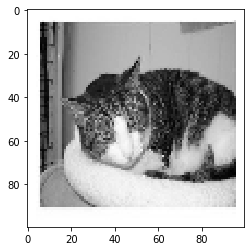

In [30]:
imshow(X_test[0][0][10,:,:,0], cmap='gray')

In [31]:
X_test[0][1][0]

array([1., 0.], dtype=float32)

In [35]:
model.evaluate(X_test)

94/94 [==============================] - 11s 116ms/step


[1.0270106792449951, 0.7098065614700317]

In [36]:
model.metrics_names

['loss', 'accuracy']